<a href="https://colab.research.google.com/github/kkarolina71/ML_2024/blob/Case-1/Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Przygotowanie danych](#Przygotowanie-danych)**
<br>
[Korelacja](#Korelacja)
<br>
[Wartości odstające](#Wartości-odstające)
<br>
[Uzupełnienie braków średnią](#Uzupełnienie-braków-średnią)
<br>
**[Tworzenie modeli](#Tworzenie-modeli)**
<br>
[KNN](#KNN)
<br>
[BalancedRandomForestClassifier](#BalancedRandomForestClassifier)
<br>
[LogisticRegression](#LogisticRegression)
<br>
[SVM](#SVM)
<br>
**[Wyniki](#Wyniki)**
<br>
[Podsumowanie](#Podsumowanie)

In [132]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from skopt.space import Integer, Categorical
from colorama import Fore, Style
from numpy import percentile


import warnings
warnings.filterwarnings("ignore")

[Dane](https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset/data) dotyczące oszustw na Ethereum

Kolumna **'FLAG'** - okresla czy coś jest oszustwem (1) czy nie (0)

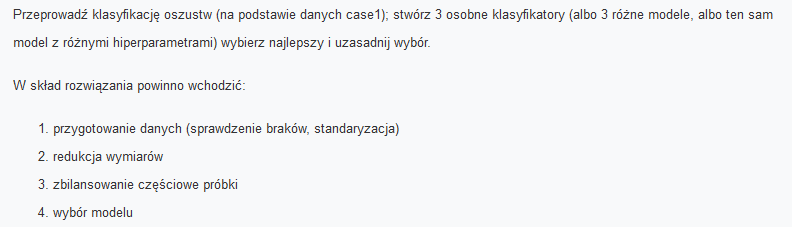

## Ogólny przegląd danych

In [3]:
data = pd.read_csv('case1.csv', sep=';')

In [4]:
data.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [6]:
data.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [7]:
# Checking how many of each column contains values equal to 0
results = {}
perc_res = {}

for column in data.columns:
    if data[column].dtype == 'float64':
        count_nans = data[column].isna().sum()
        percentage_results = (count_nans / len(data)) * 100
        results[column] = count_nans
        perc_res[column] = percentage_results

        
'''
red - null cells above 90%
orange -  null cells between 80% and 90%
green -  null cells below 25%

'''

for column, zero_count in results.items():
    percentage = perc_res[column]
    if percentage > 90:
        color = Fore.RED  
    elif percentage > 80:
        color = Fore.YELLOW 
    elif percentage < 25:
        color = Fore.GREEN 
    else:
        color = ''  

    print(f'{color}Column {column} includes {percentage:.2f} % null cells.{Style.RESET_ALL}')

Column Avg min between sent tnx includes 0.00 % null cells.
Column Avg min between received tnx includes 0.00 % null cells.
Column Time Diff between first and last (Mins) includes 0.00 % null cells.
Column min value received includes 0.00 % null cells.
Column max value received  includes 0.00 % null cells.
Column avg val received includes 0.00 % null cells.
Column min val sent includes 0.00 % null cells.
Column max val sent includes 0.00 % null cells.
Column avg val sent includes 0.00 % null cells.
Column min value sent to contract includes 0.00 % null cells.
Column max val sent to contract includes 0.00 % null cells.
Column avg value sent to contract includes 0.00 % null cells.
Column total Ether sent includes 0.00 % null cells.
Column total ether received includes 0.00 % null cells.
Column total ether sent contracts includes 0.00 % null cells.
Column total ether balance includes 0.00 % null cells.
Column Total ERC20 tnxs includes 8.42 % null cells.
Column ERC20 total Ether received i

#### Korelacja

[Wyjaśnienie dlaczego są wartości puste w macierzy korelacji](https://stackoverflow.com/questions/22655667/dataframe-correlation-produces-nan-although-its-values-are-all-integers)

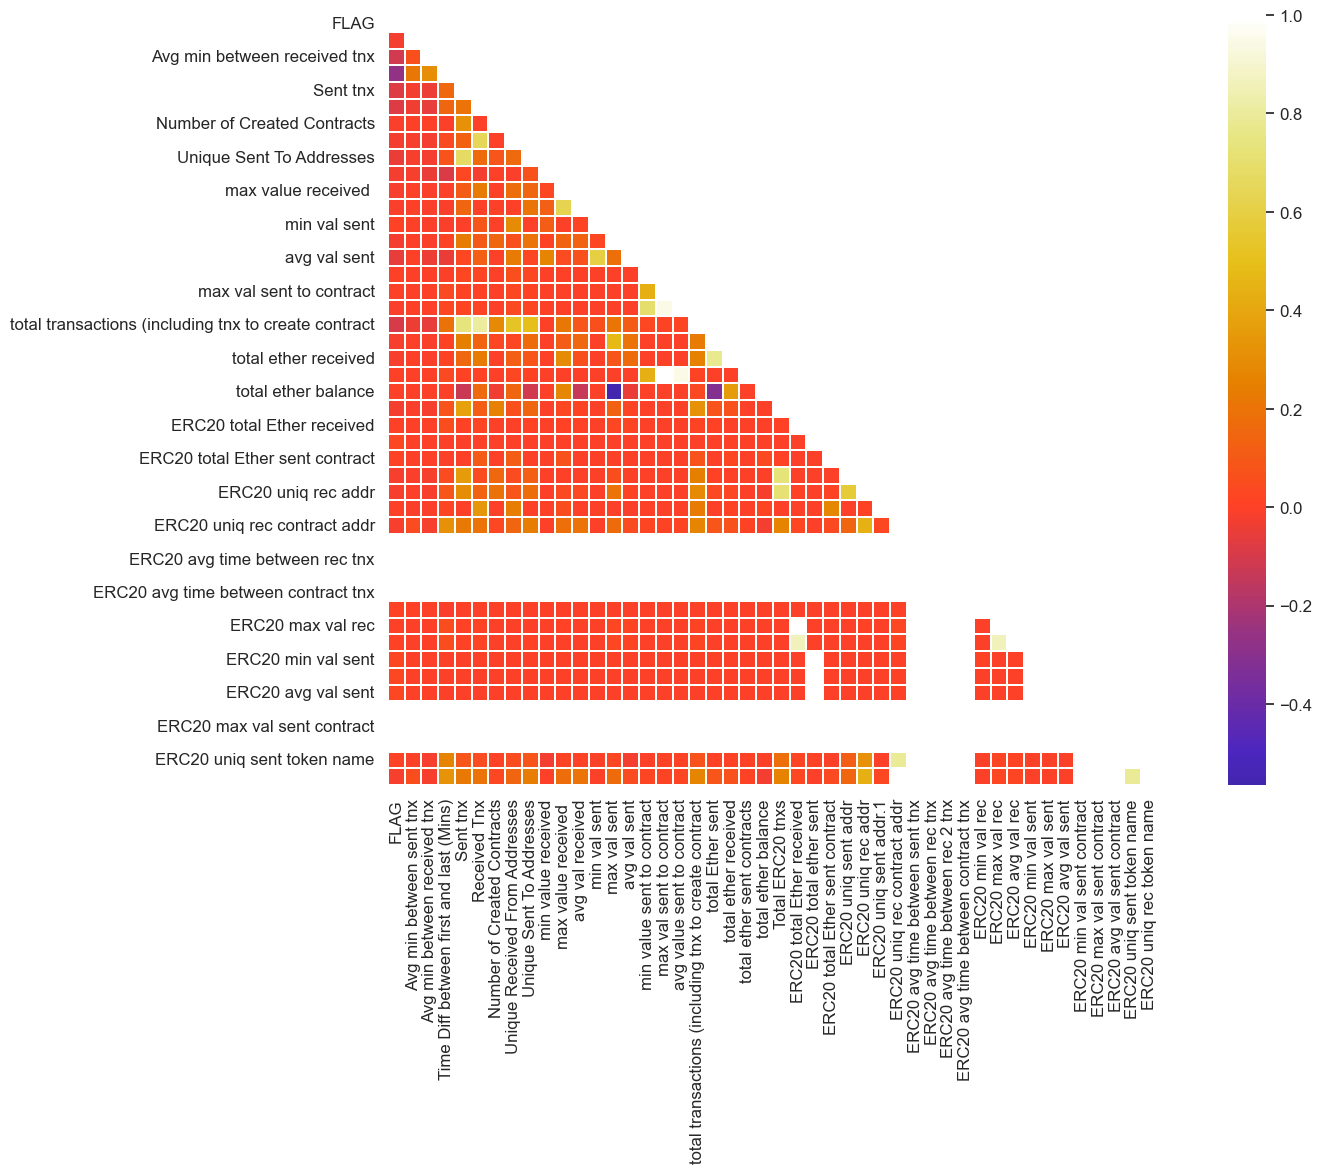

In [158]:
# korelacja zmiennych między sobą
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)


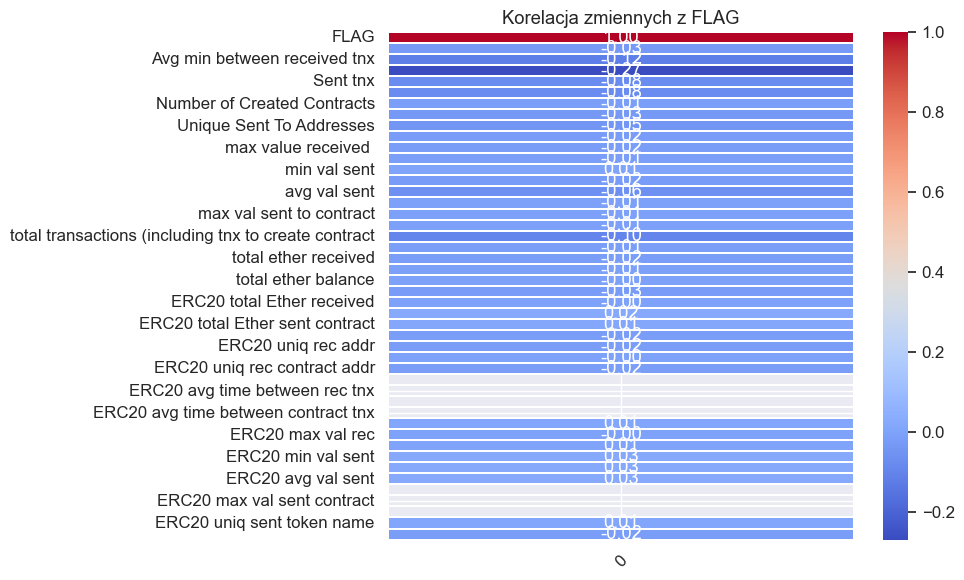

In [157]:
# Korelacja do zmiennej 'FLAG'
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(corr_with_flag), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.1)
plt.title('Korelacja zmiennych z FLAG')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Nie ma dużej korelacji zmiennej 'FLAG' do innych zmiennych.

In [8]:
data.describe().round(3)

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000,9841.000,9841.000,9841.000,9841.000,9841.000,9841.000,9841.000,9841.000,9841.000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000,9012.000
mean,4920.000,1815.050,0.221,5086.879,8004.851,218333.258,115.932,163.701,3.730,30.361,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.385,4.827
std,2840.996,1222.622,0.415,21486.550,23081.715,322937.926,757.226,940.837,141.446,298.621,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735,16.679
min,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000
25%,2460.000,821.000,0.000,0.000,0.000,316.930,1.000,1.000,0.000,1.000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000
50%,4920.000,1641.000,0.000,17.340,509.770,46637.030,3.000,4.000,0.000,2.000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,1.000
75%,7380.000,2601.000,0.000,565.470,5480.390,304070.980,11.000,27.000,0.000,5.000,...,9.900000e+01,2.946500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,2.000
max,9840.000,4729.000,1.000,430287.670,482175.490,1954860.950,10000.000,10000.000,9995.000,9999.000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000,737.000


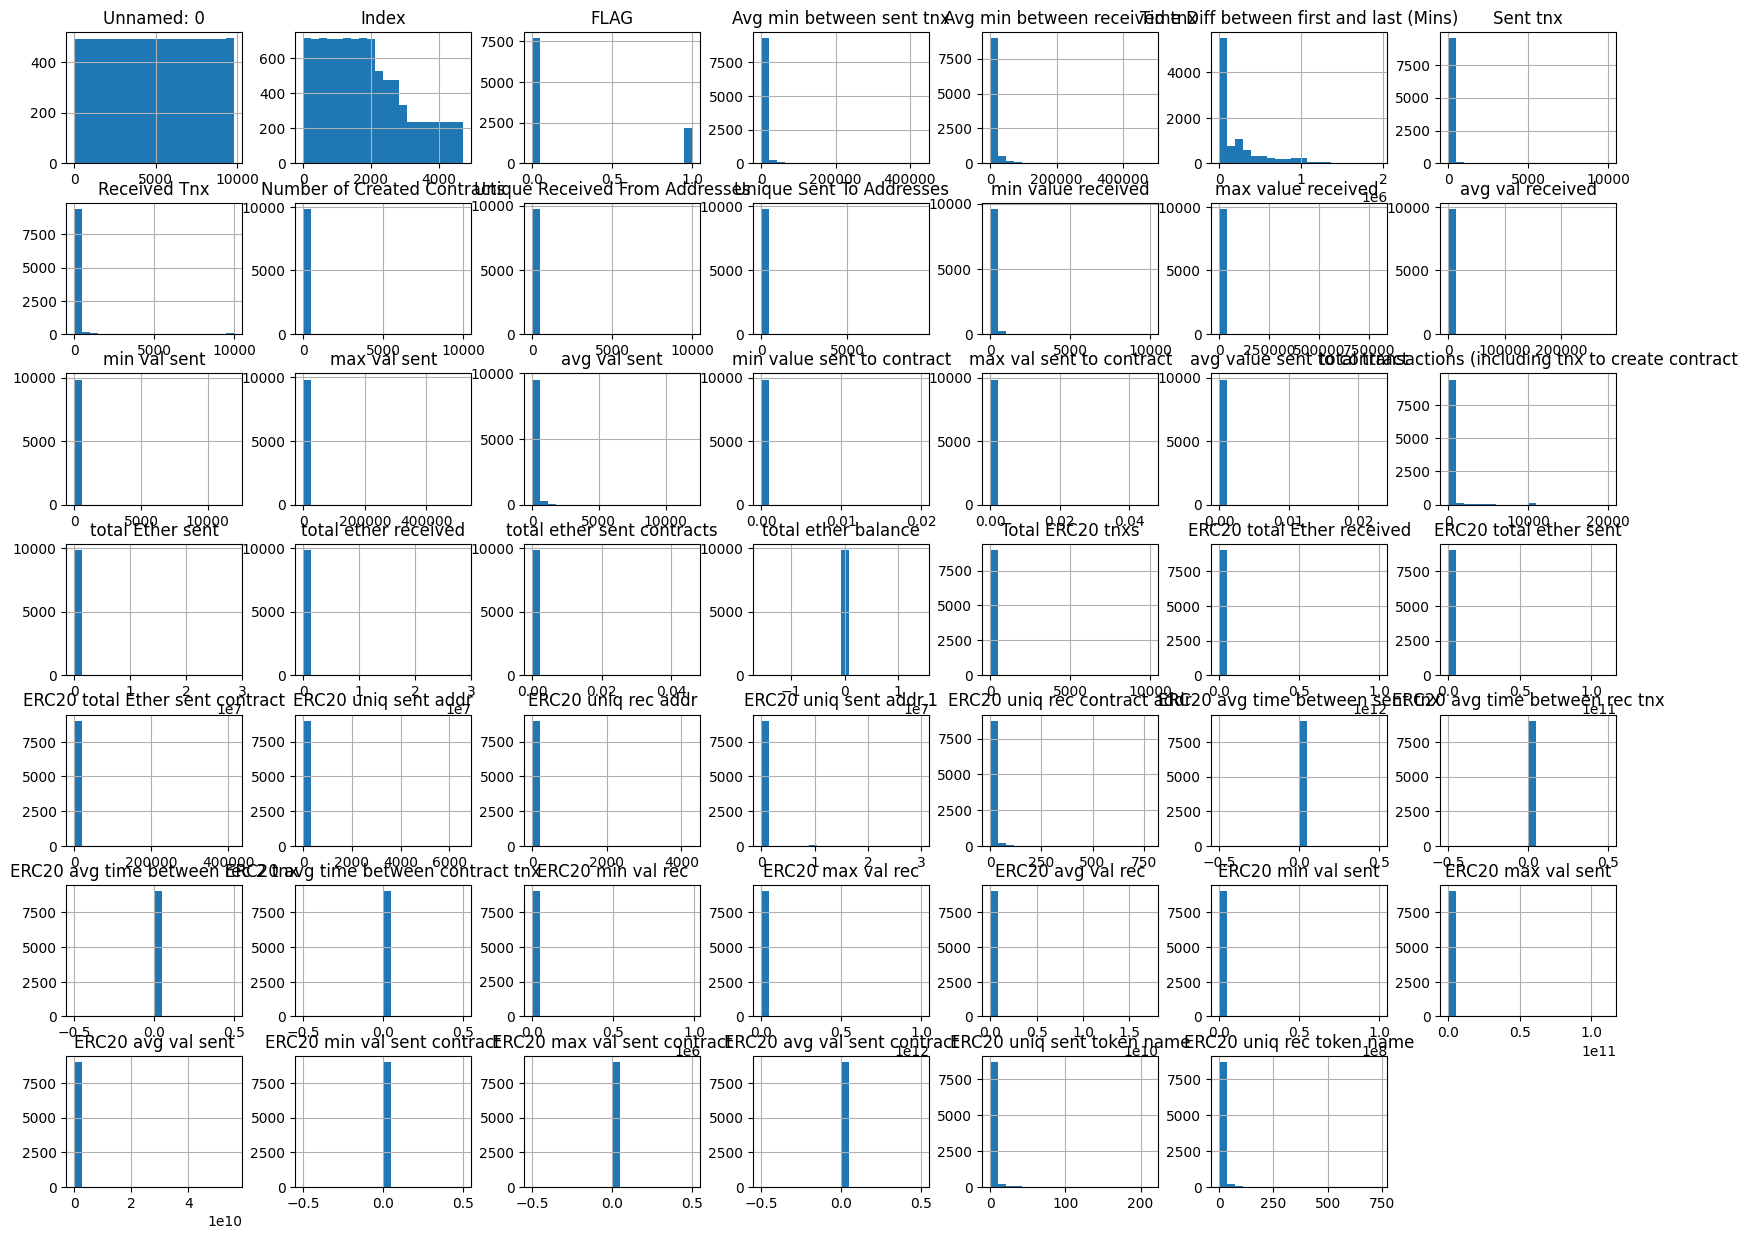

In [9]:
data.hist(bins = 20, figsize = (20, 15))
plt.show()

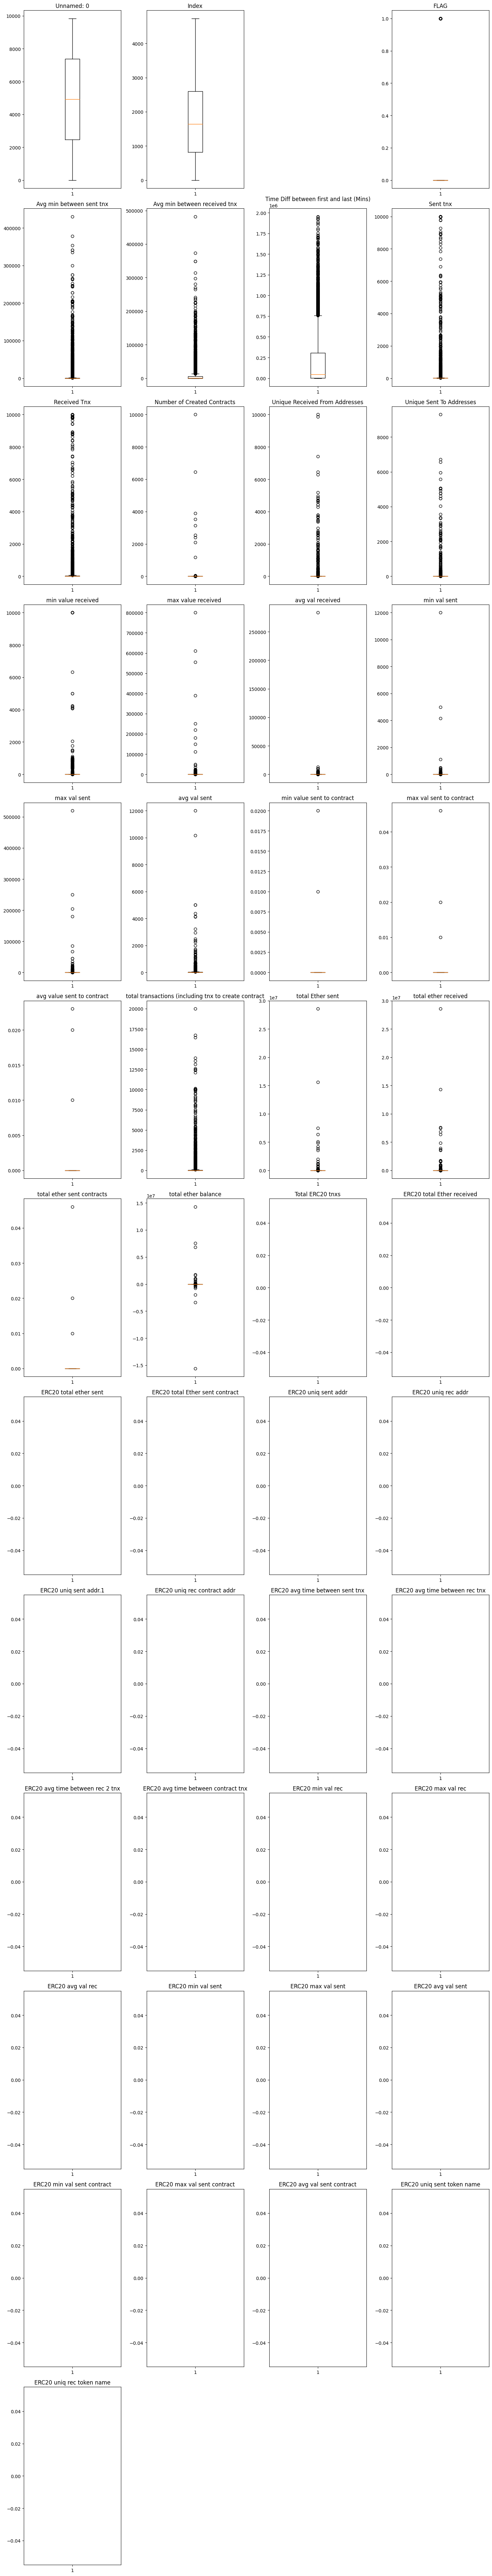

In [10]:
num_cols = 4
num_rows = (len(data.columns) + num_cols - 1) // num_cols

subplot_height = 6

# Oblicz wysokość całej figury
figure_height = subplot_height * num_rows

plt.figure(figsize=(15, figure_height))

for i, column in enumerate(data.columns):
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Wykres pudełkowy z zaznaczonymi wartościami odstającymi
        plt.boxplot(data[column], showfliers=True)
        
        plt.title(column)

plt.tight_layout()
plt.show()

Występuje wiele wartości odstających.

## Przygotowanie danych

In [102]:
data = pd.read_csv('case1.csv', sep=';')

In [103]:
df=data.drop(columns=['Index', 'Address','Unnamed: 0' ], axis = 1)
# X_median.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.reset_index(drop=True, inplace=True)

In [104]:
df.tail()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,1,37242.70,149.56,670817.33,18,3,0,1,5,0.795233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,,INS Promo1


### Podział zbioru

In [105]:
y = df['FLAG']
X = df.drop(['FLAG'], axis=1)

### Wartości odstające

Rozstęp międzykwartylowy nie jest dobrym pomysłem. Zastąpić medianą


In [106]:
# def remove_outliers_using_iqr(X_median):
#     '''
#     Funkcja usuwająca wartości odstające 
#     przy użyciu IQR
#     '''
#     Q1 = X_median.iloc[:, :-2].quantile(0.25)
#     Q3 = X_median.iloc[:, :-2].quantile(0.75)
#     IQR = Q3 - Q1
    
#     X_median_out = X_median[~((X_median.iloc[:, :-2] < (Q1 - 1.5 * IQR)) | (X_median.iloc[:, :-2] > (Q3 + 1.5 * IQR))).any(axis=1)]
    
#     return X_median_out

# # Separate the last two columns
# last_two_columns = X.iloc[:, -2:]

# # Remove the last two columns
# X_without_last_two = X.iloc[:, :-2]

# # Remove outliers from each column
# X_without_outliers = remove_outliers_using_iqr(X_without_last_two)

# X_final = pd.concat([X_without_outliers, last_two_columns], axis=1)


In [107]:
def remove_outliers_using_median(X_median):
    '''
    Funkcja zamieniająca wartości odstające na medianę
    '''
    # obliczanie mediany
    median_values = X_median.iloc[:, :-2].median()
    
    # obliczanie granic rozstępu
    Q1 = X_median.iloc[:, :-2].quantile(0.25)
    Q3 = X_median.iloc[:, :-2].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # zastąpienie wartości odstających medianą dla każdej kolumny
    X_median_out = X_median.copy()
    for col in X_median.columns[:-2]:
        is_outlier = (X_median[col] < lower_bound[col]) | (X_median[col] > upper_bound[col])
        X_median_out.loc[is_outlier, col] = median_values[col]
    
    return X_median_out

X_median = remove_outliers_using_median(X)


Usunięcie wartości odstających z kolumn przy użyciu IQR powoduje usunięcie około 90% danych. Ostatecznie wartości odstające zostały zamienione na medianę.

In [110]:
X_median.shape[0]

9841

### Uzupełnienie braków średnią

In [111]:
# wybór numerycznych kolumn
numeric_columns = X_median.select_dtypes(include=['number'])

# uzupełnieinie braków średnią
numeric_columns.fillna(numeric_columns.mean(), inplace=True)

# złączenie uzupełnionych kolumn z oryginalnymi danymi
X_median.update(numeric_columns)

In [112]:
# Kolumna ERC20 most sent token i ERC20_most_rec_token_type nie są numeryczne
X_median['ERC20 most sent token type'].value_counts()

ERC20 most sent token type
0                                                         4399
                                                          1191
EOS                                                        138
OmiseGO                                                    137
Golem                                                      130
                                                          ... 
BlockchainPoland                                             1
Covalent Token                                               1
Nebula AI Token                                              1
Blocktix                                                     1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: count, Length: 304, dtype: int64

In [113]:
X_median['ERC20_most_rec_token_type'].value_counts()

ERC20_most_rec_token_type
0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: count, Length: 466, dtype: int64

In [114]:
# przekształcenei zmiennych obliektowych na kategorie
categories = X_median.select_dtypes('O').columns.astype('category')
X_median[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [115]:
#Zamiana pustych wierszy na '0' oraz uzupełneinie pustych wartości '0'
for column in ['ERC20 most sent token type', 'ERC20_most_rec_token_type']:
    X_median[column] = X_median[column].replace(['', ' '], '0')
    X_median[column].fillna('0', inplace=True)


In [116]:
# Uzupełnienie wartości w kolumnach nienumerycznych najczęściej występującą wartością
# w tym przypadku jest to 0
for column in ['ERC20 most sent token type', 'ERC20_most_rec_token_type']:
    if X_median[column].dtype == 'category':
        most_common_value = X_median[column].mode()[0]
        X_median[column].fillna(most_common_value, inplace=True)

In [117]:
X_median.describe()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.0,9841.000000,9841.000000,9841.000000,9841.000000,...,9841.000000,9841.000000,9841.0,9841.0,9841.0,9841.0,9841.0,9841.0,9841.0,9841.000000
mean,71.675994,1649.826296,124889.218318,3.441317,7.667209,0.0,2.732751,1.647698,0.287201,23.008792,...,6.133387,2.822019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.845650
std,196.253112,2871.101986,180892.017224,4.497881,11.616768,0.0,2.284161,1.286009,0.695329,35.476947,...,24.264329,9.624791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.087919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,316.930000,1.000000,1.000000,0.0,1.000000,1.000000,0.001000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,17.340000,509.770000,46637.030000,3.000000,4.000000,0.0,2.000000,2.000000,0.095856,6.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.845650
75%,22.380000,1832.940000,201544.900000,3.000000,7.000000,0.0,3.000000,2.000000,0.112211,25.001033,...,1.337000,1.095282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,1410.710000,13679.010000,759016.450000,26.000000,66.000000,0.0,11.000000,6.000000,4.997787,165.223152,...,241.819178,73.614797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000


## Tworzenie modeli

Wykorzystane modele:
* **KNeighbors**
* **BalancedRandomForest** (losuje próbkę bootstrapową z klasy mniejszości i próbkuje z zastąpieniem taką samą liczbę próbek z klasy większości)
* **SVM**

In [118]:
# X_median -> przekształcone dane
X_train, X_test, y_train, y_test = train_test_split(X_median, y, test_size=0.33, random_state=42)

In [119]:
y_train.value_counts()

FLAG
0    5135
1    1458
Name: count, dtype: int64

### Pipeline

In [120]:
columns_to_encode = ['ERC20 most sent token type', 'ERC20_most_rec_token_type']

onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# przkształcenie kolumn
column_transformer = ColumnTransformer([
    ('onehot', onehot_encoder, columns_to_encode)],  
    remainder='passthrough'
)


over = SMOTE(sampling_strategy='minority') # 'minority' próbkowanie mniejszościowej klasy do równosci z większościową
under = RandomUnderSampler(sampling_strategy='majority') # 'majority' większościowa klasa równa mniejszościowej
pca = PCA(svd_solver='arpack') 
maxabs_scaler = MaxAbsScaler() # obsluguje macierze rzadkie

# pipeline = make_pipeline(column_transformer,minmax_scaler, over, under, pca, model)


In [121]:
# wyświetlanie wyników
def model_result(y_test, y_pred):
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.set(font_scale=1.1)
    sns.heatmap(cm,  cmap = 'Spectral',  annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred),4)
    recall = round(recall_score(y_test, y_pred),4)

    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')

In [122]:
X_train

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
1317,23.76,0.18,71.63,3,2,0,2,3,0.095856,88.358692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4151,2.41,0.00,9.63,4,2,0,2,4,0.095856,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
121,5.13,3733.57,127115.70,3,34,0,1,2,0.103256,1.000945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2449,250.97,307.42,315727.97,3,58,0,2,2,0.500000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,OmiseGO
3753,159.49,0.80,320.58,2,2,0,2,2,0.095856,60.417795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.00,509.77,226760.43,0,14,0,6,0,0.000000,14.419115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,OmiseGO
5191,0.00,0.00,15369.12,1,1,0,1,1,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,Livepeer Token
5390,0.00,0.00,1.77,1,1,0,1,1,1.990000,1.990000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
860,165.15,0.00,330.30,2,2,0,2,2,0.095856,51.229593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [123]:
y_train.value_counts()

FLAG
0    5135
1    1458
Name: count, dtype: int64

## KNN

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2527
           1       0.81      0.94      0.87       721

    accuracy                           0.94      3248
   macro avg       0.90      0.94      0.92      3248
weighted avg       0.94      0.94      0.94      3248

ROC-AUC Score: 0.9391158017680892


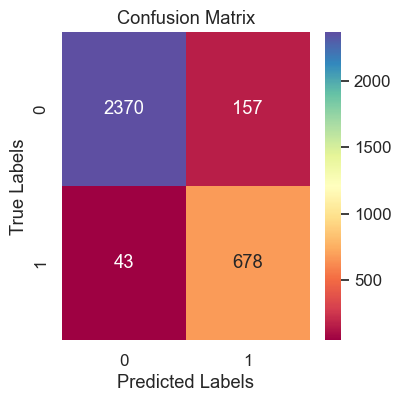

Accuracy: 0.9384
Precision: 0.812
Recall: 0.9404
Cross-Validation ROC-AUC Score: 0.9755127417423222


In [124]:
model_knn = KNeighborsClassifier()

knn_pipeline = make_pipeline(column_transformer, maxabs_scaler, over, under, pca, model_knn)

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)

# Ewaluacja modelu
model_result(y_test, y_pred)

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
scores = cross_val_score(knn_pipeline, X_median, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print("Cross-Validation ROC-AUC Score:", scores.mean())


## BalancedRandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2527
           1       0.92      0.95      0.93       721

    accuracy                           0.97      3248
   macro avg       0.95      0.96      0.96      3248
weighted avg       0.97      0.97      0.97      3248

ROC-AUC Score: 0.9624694080628244


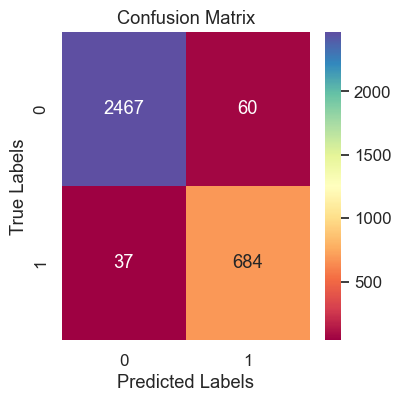

Accuracy: 0.9701
Precision: 0.9194
Recall: 0.9487
Cross-Validation ROC-AUC Score: 0.9960900148715178


In [161]:
rf_model = BalancedRandomForestClassifier()
rf_pipeline = make_pipeline(column_transformer, rf_model) # bez PCA

rf_pipeline.fit(X_train, y_train)

rf_y_pred = rf_pipeline.predict(X_test)

model_result(y_test, rf_y_pred)

rf_scores = cross_val_score(rf_pipeline, X_median, y, scoring='roc_auc', cv=cv, n_jobs=1)
print("Cross-Validation ROC-AUC Score:", rf_scores.mean())

#### BalancedRandomForest z PCA

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2527
           1       0.93      0.90      0.91       721

    accuracy                           0.96      3248
   macro avg       0.95      0.94      0.94      3248
weighted avg       0.96      0.96      0.96      3248

ROC-AUC Score: 0.9392848498353703


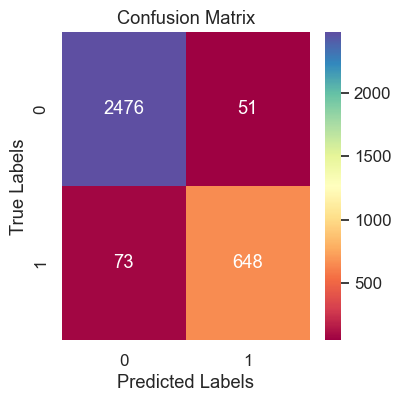

Accuracy: 0.9618
Precision: 0.927
Recall: 0.8988
Cross-Validation ROC-AUC Score: 0.9900546881632017


In [134]:
rf_model = BalancedRandomForestClassifier()
rf_pipeline = make_pipeline(column_transformer, pca, rf_model)

rf_pipeline.fit(X_train, y_train)

rf_y_pred = rf_pipeline.predict(X_test)

model_result(y_test, rf_y_pred)

rf_scores = cross_val_score(rf_pipeline, X_median, y, scoring='roc_auc', cv=cv, n_jobs=1)
print("Cross-Validation ROC-AUC Score:", rf_scores.mean())

## SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2527
           1       0.92      0.93      0.93       721

    accuracy                           0.97      3248
   macro avg       0.95      0.95      0.95      3248
weighted avg       0.97      0.97      0.97      3248

ROC-AUC Score: 0.9523630230404831


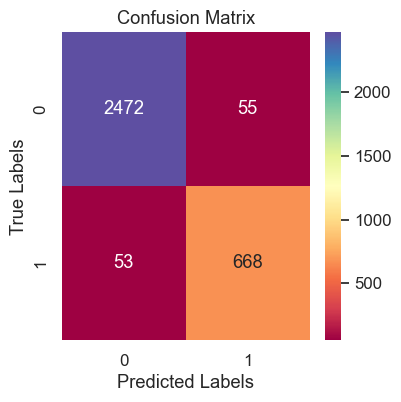

Accuracy: 0.9667
Precision: 0.9239
Recall: 0.9265
Cross-Validation ROC-AUC Score: 0.9897045381105593


In [128]:
svm_model = SVC()  
svm_pipeline = make_pipeline(column_transformer, maxabs_scaler, over, under, pca, svm_model)
svm_pipeline.fit(X_train, y_train)
svm_y_pred = svm_pipeline.predict(X_test)
model_result(y_test, svm_y_pred)
svm_scores = cross_val_score(svm_pipeline, X_median, y, scoring='roc_auc', cv=cv, n_jobs=1)
print("Cross-Validation ROC-AUC Score:", svm_scores.mean())

### Domyślne parametry poszczególnych modeli

In [68]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [135]:
rf_model.get_params()

{'bootstrap': 'warn',
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'replacement': 'warn',
 'sampling_strategy': 'warn',
 'verbose': 0,
 'warm_start': False}

In [70]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Wyniki



Modele zostały stworzone przy użyciu domyślnych parametrów i następujących przekształceń:

    make_peline(OneHotEncoder, maxabs_scaler, over_sampling, under_sampling, PCA, ML_model)
    
Przy czym BalancedRandomForest został przeprowadzony w 2 wersjach. W każdej z nich wykorzystany był OneHotEncoder i w jednej z nich PCA (BalancedRandomForest (PCA)). Do tego modelu nie została zastosowana standaryzacja oraz skalowanie, bo dane zostały już odpowiednio przygotowane pod PCA.

Najbardziej interesuje nas wynik Recall, mówiący o tym ile ze wszystkich rzeczywistycch pozytywów, model prawidłowo przewidział. 



### Krótkie podsumowanie w tabelach
Pierwsza z nich przedstawia wyniki poszczególnych miar oraz wynik z walidacji krzyżowej.
<br>
Poniżej jest wynik recall z podsumowania klasyfikacji

| Wskaźnik\Model   | KNeighbors | BalancedRandomForest | BalancedRandomForest (PCA) |   SVM  |
|------------------|:--------------------:|:------------------------------:|:------------------------------------:|:------:|
| Accuracy         |        0.9384        |             0.9701             |                0.9711                | 0.9667 |
| Precision        |         0.812        |             0.9194             |                 0.927                | 0.9239 |
| Recall           |        0.9404        |             0.9487             |                0.8988                | 0.9265 |
| C-V ROC-AUC score (mean) |        0.9755        |             0.9960             |                0.9900                | 0.9897 |

| Model\Wynik recall         |   0  |   1  |
|----------------------------|:----:|:----:|
| KNeighbors                 | 0.94 | 0.94 |
| BalancedRandomForest       | 0.98 | 0.95 |
| BalancedRandomForest (PCA) | 0.98 | 0.90 |
| SVM                        | 0.98 | 0.93 |

### Podsumowanie

`BalancedRandomForest` uzyskał najwyższy recall.
Z kolei ten sam algorytm z PCA uzyskał niższy recall ale zwiększył nieznacznie precyzję. Średni wynik z walidacji krzyżowej ma bardzo wysoki, bo na poziomie 99%.

Sugerując się powyższymi tabelami oraz wynikami z macierzy pomyłek najlepszymi modelami są `BalancedRandomForest` oraz `SVM`. Z tych dwóch wybrałabym, `SVM`, bo ma wyższy recall oraz lepiej poradził sobie z klasyfikacją w klasie '1'.



